# Histoires de vie 2003 : Exemple 

Version du 5 juin 2022


Ce carnet contient une ébauche d'analyse à titre d'exemple. Les étudiant·e·s pourront multiplier les analyses et ajouter des commentaires plus développés.


### Source des données

* https://www.insee.fr/fr/statistiques/2532244#documentation
* https://juba.github.io/tidyverse/22-ressources.html#hdv2003




### Description des variables (dictionnaire des données)

id : Identifiant (numéro de ligne)

poids : Variable de pondération
* [La pondération des données](https://blogue.som.ca/la-ponderation-des-donnees/)
*  [Comment calculer une moyenne pondérée](https://fr.wikihow.com/calculer-une-moyenne-pond%C3%A9r%C3%A9e)

age : Âge

sexe : Sexe

nivetud : Niveau d’études atteint

occup : Occupation actuelle

qualif : Qualification de l’emploi actuel

freres.soeurs : Nombre total de frères, sœurs, demi-frères et demi-sœurs

clso : Sentiment d’appartenance à une classe sociale

relig : Pratique et croyance religieuse

trav.imp : Importance accordée au travail

trav.satisf : Satisfaction ou insatisfaction au travail

hard.rock : Écoute du Hard rock ou assimilés

lecture.bd : Lecture de bandes dessinées

peche.chasse : Pêche ou chasse pour le plaisir au cours des 12 derniers mois

cuisine : Cuisine pour le plaisir au cours des 12 derniers mois

bricol : Bricolage ou mécanique pour le plaisir au cours des 12 derniers mois

cinema : Cinéma au cours des 12 derniers mois

sport : Sport ou activité physique pour le plaisir au cours des 12 derniers mois

heures.tv : Nombre moyen d’heures passées à regarder la télévision par jour



## Importer les librairies nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import copy

# Importer le fichier



In [2]:
### Lire le fichier 

chemin = 'data/hdv2003.csv'

obs = pd.read_csv(chemin)
obs.set_index('id', inplace=True)
obs.head()

,age,sexe,nivetud,poids,occup,qualif,freres.soeurs,clso,relig,trav.imp,trav.satisf,hard.rock,lecture.bd,peche.chasse,cuisine,bricol,cinema,sport,heures.tv
id,,,,,,,,,,,,,,,,,,,
1,28,Femme,Enseignement superieur y compris technique sup...,2634.398216,Exerce une profession,Employe,8,Oui,Ni croyance ni appartenance,Peu important,Insatisfaction,Non,Non,Non,Oui,Non,Non,Non,0.0
2,23,Femme,NaN,9738.395776,"Etudiant, eleve",NaN,2,Oui,Ni croyance ni appartenance,NaN,NaN,Non,Non,Non,Non,Non,Oui,Oui,1.0
3,59,Homme,Derniere annee d'etudes primaires,3994.102459,Exerce une profession,Technicien,2,Non,Ni croyance ni appartenance,Aussi important que le reste,Equilibre,Non,Non,Non,Non,Non,Non,Oui,0.0
4,34,Homme,Enseignement superieur y compris technique sup...,5731.661508,Exerce une profession,Technicien,1,Non,Appartenance sans pratique,Moins important que le reste,Satisfaction,Non,Non,Non,Oui,Oui,Oui,Oui,2.0
5,71,Femme,Derniere annee d'etudes primaires,4329.094002,Retraite,Employe,0,Oui,Pratiquant regulier,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,3.0


In [3]:
## Propriétés du tableau
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            2000 non-null   int64  
 1   sexe           2000 non-null   object 
 2   nivetud        1888 non-null   object 
 3   poids          2000 non-null   float64
 4   occup          2000 non-null   object 
 5   qualif         1653 non-null   object 
 6   freres.soeurs  2000 non-null   int64  
 7   clso           2000 non-null   object 
 8   relig          2000 non-null   object 
 9   trav.imp       1048 non-null   object 
 10  trav.satisf    1048 non-null   object 
 11  hard.rock      2000 non-null   object 
 12  lecture.bd     2000 non-null   object 
 13  peche.chasse   2000 non-null   object 
 14  cuisine        2000 non-null   object 
 15  bricol         2000 non-null   object 
 16  cinema         2000 non-null   object 
 17  sport          2000 non-null   object 
 18  heures.t

In [5]:
### Remplacer les valeurs vides par 'inconnu'
obs['nivetud'] = obs['nivetud'].fillna('inconnu')

In [6]:
obs['sexe'].value_counts()

Femme    1101
Homme     899
Name: sexe, dtype: int64

In [7]:
obs['freres.soeurs'].describe()

count    2000.000000
mean        3.283000
std         2.766539
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        22.000000
Name: freres.soeurs, dtype: float64

<AxesSubplot:>

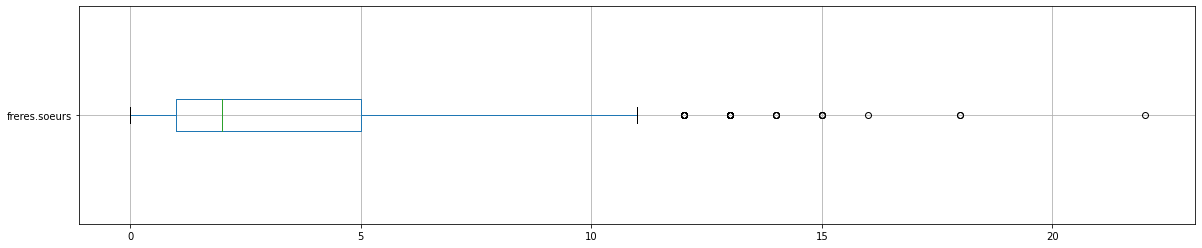

In [8]:
###  Représentation graphique de la distribution
obs.boxplot(column=['freres.soeurs'], vert=False, figsize=(20,4))

### Heures TV

In [4]:
### Remplacer les valeurs vides par 0
obs['heures.tv'] = obs['heures.tv'].fillna(0)

In [9]:
obs['heures.tv'].describe()

count    2000.000000
mean        2.240950
std         1.777177
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: heures.tv, dtype: float64

<AxesSubplot:>

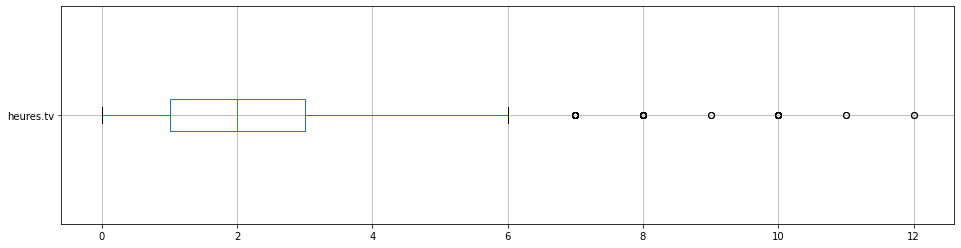

In [13]:
obs.boxplot(column=['heures.tv'], vert=False, figsize=(16,4))

In [10]:
### Généralement on ne calcule pas la distribution d'une variable continue,
#  mais là on met en évidence une particularité: beaucoup de chiffres entiers 
#  et quelques particularités : 5,1 h ?!?
obs['heures.tv'].value_counts()

2.0     494
3.0     388
1.0     290
0.0     244
4.0     190
5.0      86
6.0      49
0.4      46
0.3      29
0.1      26
1.4      24
0.7      21
0.6      19
8.0      13
7.0      13
1.1      12
0.9      12
10.0     12
2.9       8
2.1       7
1.7       5
9.0       2
12.0      2
0.2       2
11.0      2
2.7       1
4.6       1
4.3       1
5.1       1
Name: heures.tv, dtype: int64

In [11]:
### Regrouper les valeurs continues en classes (variable qualitative ou catégorielle)

dc = [0, 0.51, 2.01, 5.01, 15]

obs['h_tv_cut'] = pd.cut(obs['heures.tv'], dc, right=False)
obs.head()



,age,sexe,nivetud,poids,occup,qualif,freres.soeurs,clso,relig,trav.imp,trav.satisf,hard.rock,lecture.bd,peche.chasse,cuisine,bricol,cinema,sport,heures.tv,h_tv_cut
id,,,,,,,,,,,,,,,,,,,,
1,28,Femme,Enseignement superieur y compris technique sup...,2634.398216,Exerce une profession,Employe,8,Oui,Ni croyance ni appartenance,Peu important,Insatisfaction,Non,Non,Non,Oui,Non,Non,Non,0.0,"[0.0, 0.51)"
2,23,Femme,inconnu,9738.395776,"Etudiant, eleve",NaN,2,Oui,Ni croyance ni appartenance,NaN,NaN,Non,Non,Non,Non,Non,Oui,Oui,1.0,"[0.51, 2.01)"
3,59,Homme,Derniere annee d'etudes primaires,3994.102459,Exerce une profession,Technicien,2,Non,Ni croyance ni appartenance,Aussi important que le reste,Equilibre,Non,Non,Non,Non,Non,Non,Oui,0.0,"[0.0, 0.51)"
4,34,Homme,Enseignement superieur y compris technique sup...,5731.661508,Exerce une profession,Technicien,1,Non,Appartenance sans pratique,Moins important que le reste,Satisfaction,Non,Non,Non,Oui,Oui,Oui,Oui,2.0,"[0.51, 2.01)"
5,71,Femme,Derniere annee d'etudes primaires,4329.094002,Retraite,Employe,0,Oui,Pratiquant regulier,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,3.0,"[2.01, 5.01)"


In [12]:
### Distribution par classe
obs['h_tv_cut'].value_counts().sort_index()

[0.0, 0.51)     347
[0.51, 2.01)    877
[2.01, 5.01)    682
[5.01, 15.0)     94
Name: h_tv_cut, dtype: int64

### Âge

In [14]:
obs['age'].describe()

count    2000.000000
mean       48.157000
std        16.941808
min        18.000000
25%        35.000000
50%        48.000000
75%        60.000000
max        97.000000
Name: age, dtype: float64

(18.0, 97.0)

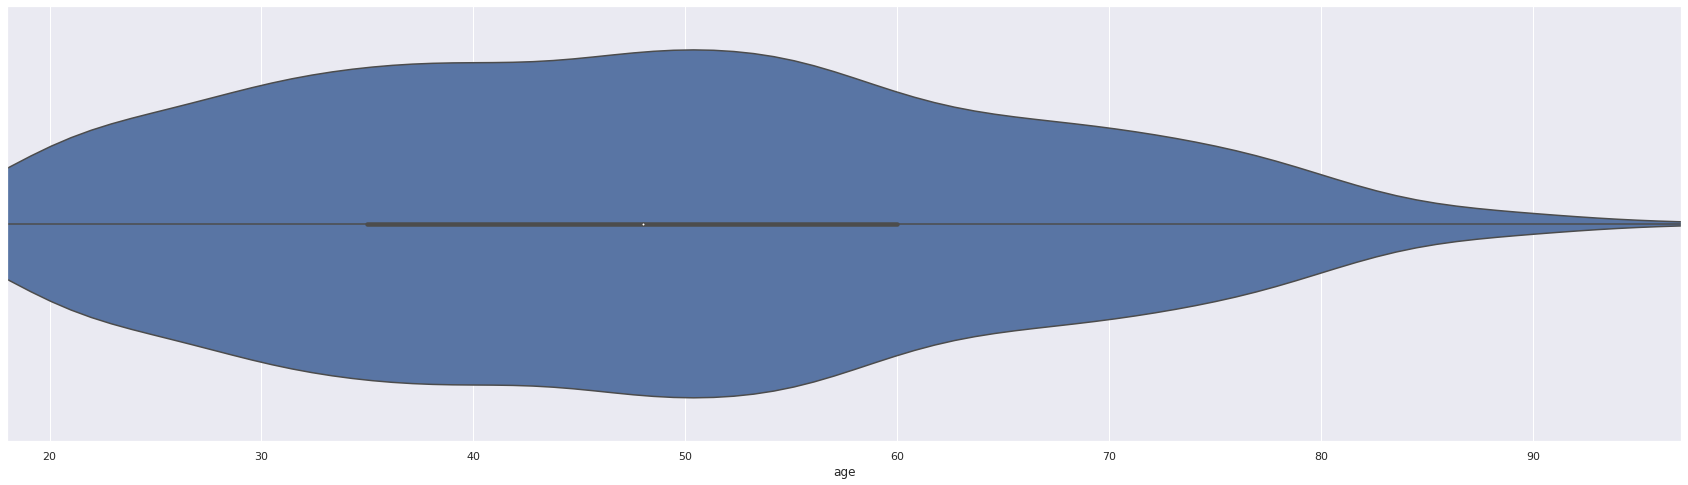

In [15]:
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(30, 8)})

a = obs['age']
ax = sns.violinplot(x=a, figsize=(16,4))
ax.set_xlim(left=min(a), right=max(a))

### Comparer âge et durée TV

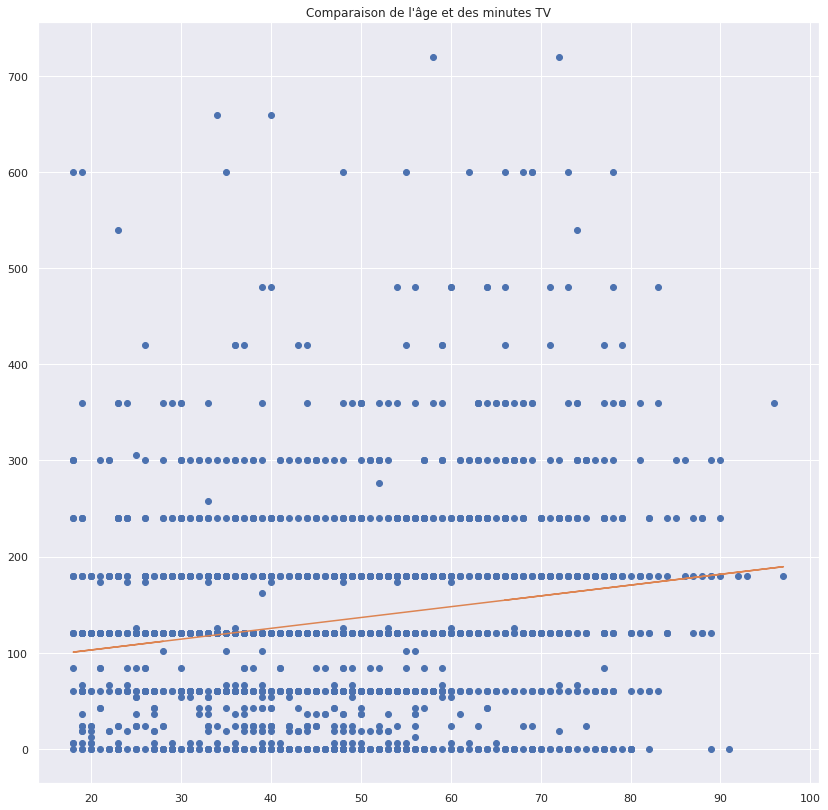

In [16]:
## Nuage de points avec droite de régression
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

x = np.array(obs['age'])
y = [v*60 for v in np.array(obs['heures.tv'])] #np.array(obs['heures.tv'])


plt.rcParams["figure.figsize"] = [14, 14]

plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des minutes TV")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)


In [17]:
### Coéfficient de corrélation de Pearsons 
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
np.corrcoef([x,y])[1][0]

0.17875836446722318

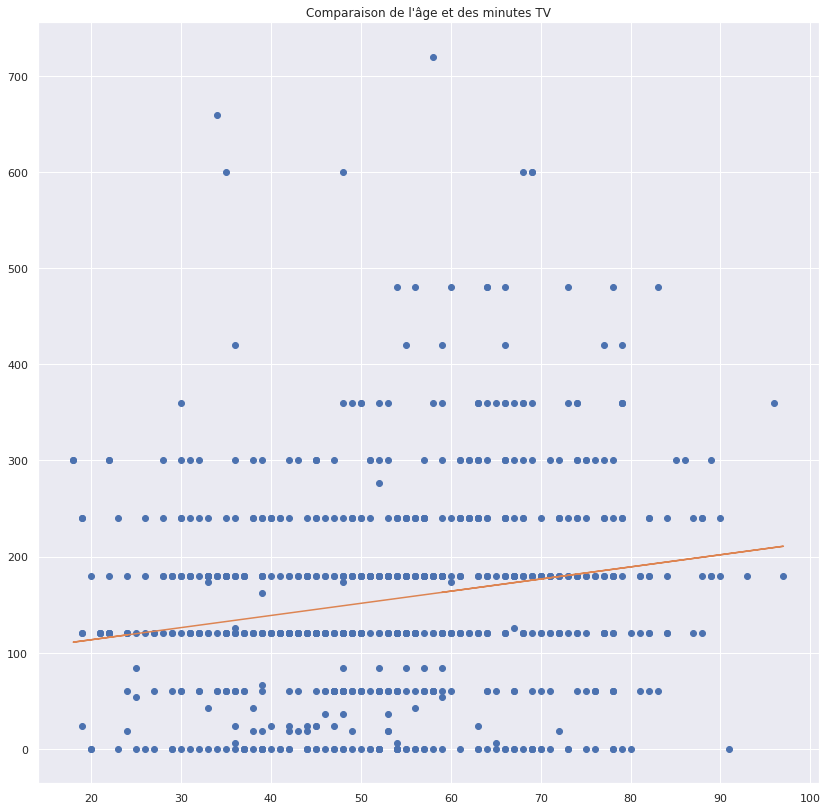

In [19]:
## Nuage de points avec droite de régression mais avec un FILTRE = remplacer à tour de role

### Commenter et décommenter pour analyser différents cas de figure
# f = obs[obs['nivetud'] == 'Enseignement superieur y compris technique superieur']
# f = obs[obs['nivetud'].isin(["A arrete ses etudes, avant la derniere annee d'etudes primaires","N'a jamais fait d'etudes"])]
f = obs[obs['nivetud'].isin(["Derniere annee d'etudes primaires", "Enseignement technique ou professionnel court"])]



x = np.array(f['age'])
y = [v*60 for v in f['heures.tv']] #np.array(obs['heures.tv'])


plt.rcParams["figure.figsize"] = [14, 14]

plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des minutes TV")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)


In [20]:
###  Coéfficient de corrélation de Pearsons 
# https://www.statology.org/pearson-correlation-coefficient/
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

r = np.corrcoef([x,y])[0][1]
r

0.1855164677582769

In [21]:
len(f)

804

In [22]:
### https://www.statology.org/pearson-correlation-coefficient/
T = r * np.sqrt((len(obs)-2) / (1-r))
T

9.18838226158073

In [40]:
### p value
# https://www.statology.org/t-score-p-value-calculator/


# Variables qualitatives

In [30]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            2000 non-null   int64   
 1   sexe           2000 non-null   object  
 2   nivetud        2000 non-null   object  
 3   poids          2000 non-null   float64 
 4   occup          2000 non-null   object  
 5   qualif         1653 non-null   object  
 6   freres.soeurs  2000 non-null   int64   
 7   clso           2000 non-null   object  
 8   relig          2000 non-null   object  
 9   trav.imp       1048 non-null   object  
 10  trav.satisf    1048 non-null   object  
 11  hard.rock      2000 non-null   object  
 12  lecture.bd     2000 non-null   object  
 13  peche.chasse   2000 non-null   object  
 14  cuisine        2000 non-null   object  
 15  bricol         2000 non-null   object  
 16  cinema         2000 non-null   object  
 17  sport          2000 non-null   ob

In [29]:
obs['nivetud'].value_counts()

('Total : 2000',
 Enseignement technique ou professionnel court                      463
 Enseignement superieur y compris technique superieur               441
 Derniere annee d'etudes primaires                                  341
 1er cycle                                                          204
 2eme cycle                                                         183
 Enseignement technique ou professionnel long                       131
 inconnu                                                            112
 A arrete ses etudes, avant la derniere annee d'etudes primaires     86
 N'a jamais fait d'etudes                                            39
 Name: nivetud, dtype: int64)

In [34]:
tt = sum(obs['qualif'].value_counts())
f'Total : {tt}' , obs['qualif'].value_counts()

('Total : 1653',
 Employe                     594
 Ouvrier qualifie            292
 Cadre                       260
 Ouvrier specialise          203
 Profession intermediaire    160
 Technicien                   86
 Autre                        58
 Name: qualif, dtype: int64)

In [35]:
tt = sum(obs['relig'].value_counts())
f'Total : {tt}' , obs['relig'].value_counts()

('Total : 2000',
 Appartenance sans pratique     760
 Pratiquant occasionnel         442
 Ni croyance ni appartenance    399
 Pratiquant regulier            266
 Rejet                           93
 NSP ou NVPR                     40
 Name: relig, dtype: int64)

In [36]:
tt = sum(obs['occup'].value_counts())
f'Total : {tt}' , obs['occup'].value_counts()

('Total : 2000',
 Exerce une profession    1049
 Retraite                  392
 Au foyer                  171
 Chomeur                   134
 Etudiant, eleve            94
 Autre inactif              83
 Retire des affaires        77
 Name: occup, dtype: int64)

In [37]:
tt = sum(obs['trav.satisf'].value_counts())
f'Total : {tt}' , obs['trav.satisf'].value_counts()

('Total : 1048',
 Satisfaction      480
 Equilibre         451
 Insatisfaction    117
 Name: trav.satisf, dtype: int64)

In [38]:
tt = sum(obs['trav.imp'].value_counts())
f'Total : {tt}' , obs['trav.imp'].value_counts()

('Total : 1048',
 Moins important que le reste    708
 Aussi important que le reste    259
 Peu important                    52
 Le plus important                29
 Name: trav.imp, dtype: int64)

# Variable qualitative et quantitative

Text(0.5, 1.0, 'Densité heures tv en fonction du genre')

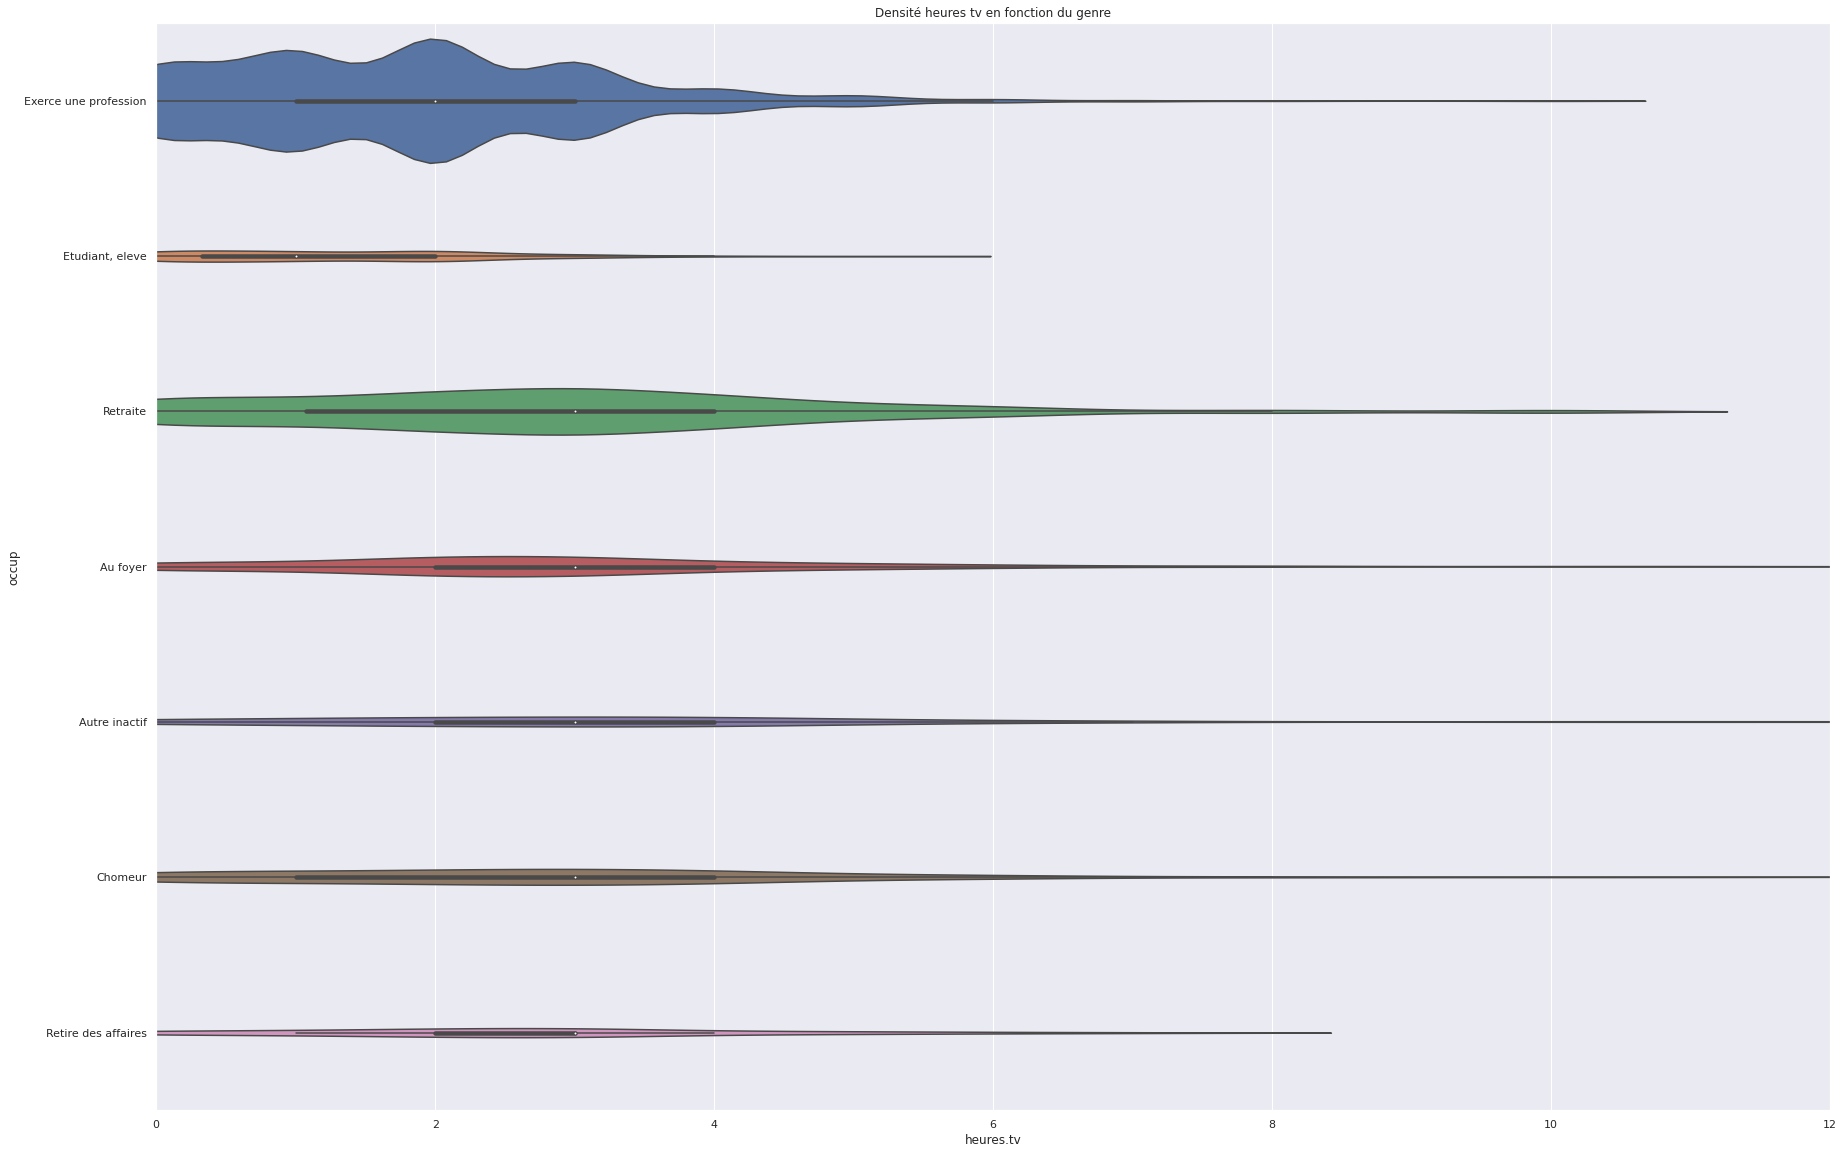

In [40]:
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(30, 20)})

### Remplacer al variable qualitative et inspecter les différentes distributions 
ax = sns.violinplot(data=obs, x='heures.tv', y='occup', scale='count')




a = obs['heures.tv']
ax.set_xlim(left=min(a), right=max(a))
ax.set_title("Densité heures tv en fonction du genre")

Text(0.5, 1.0, 'Densité heures tv en fonction du genre')

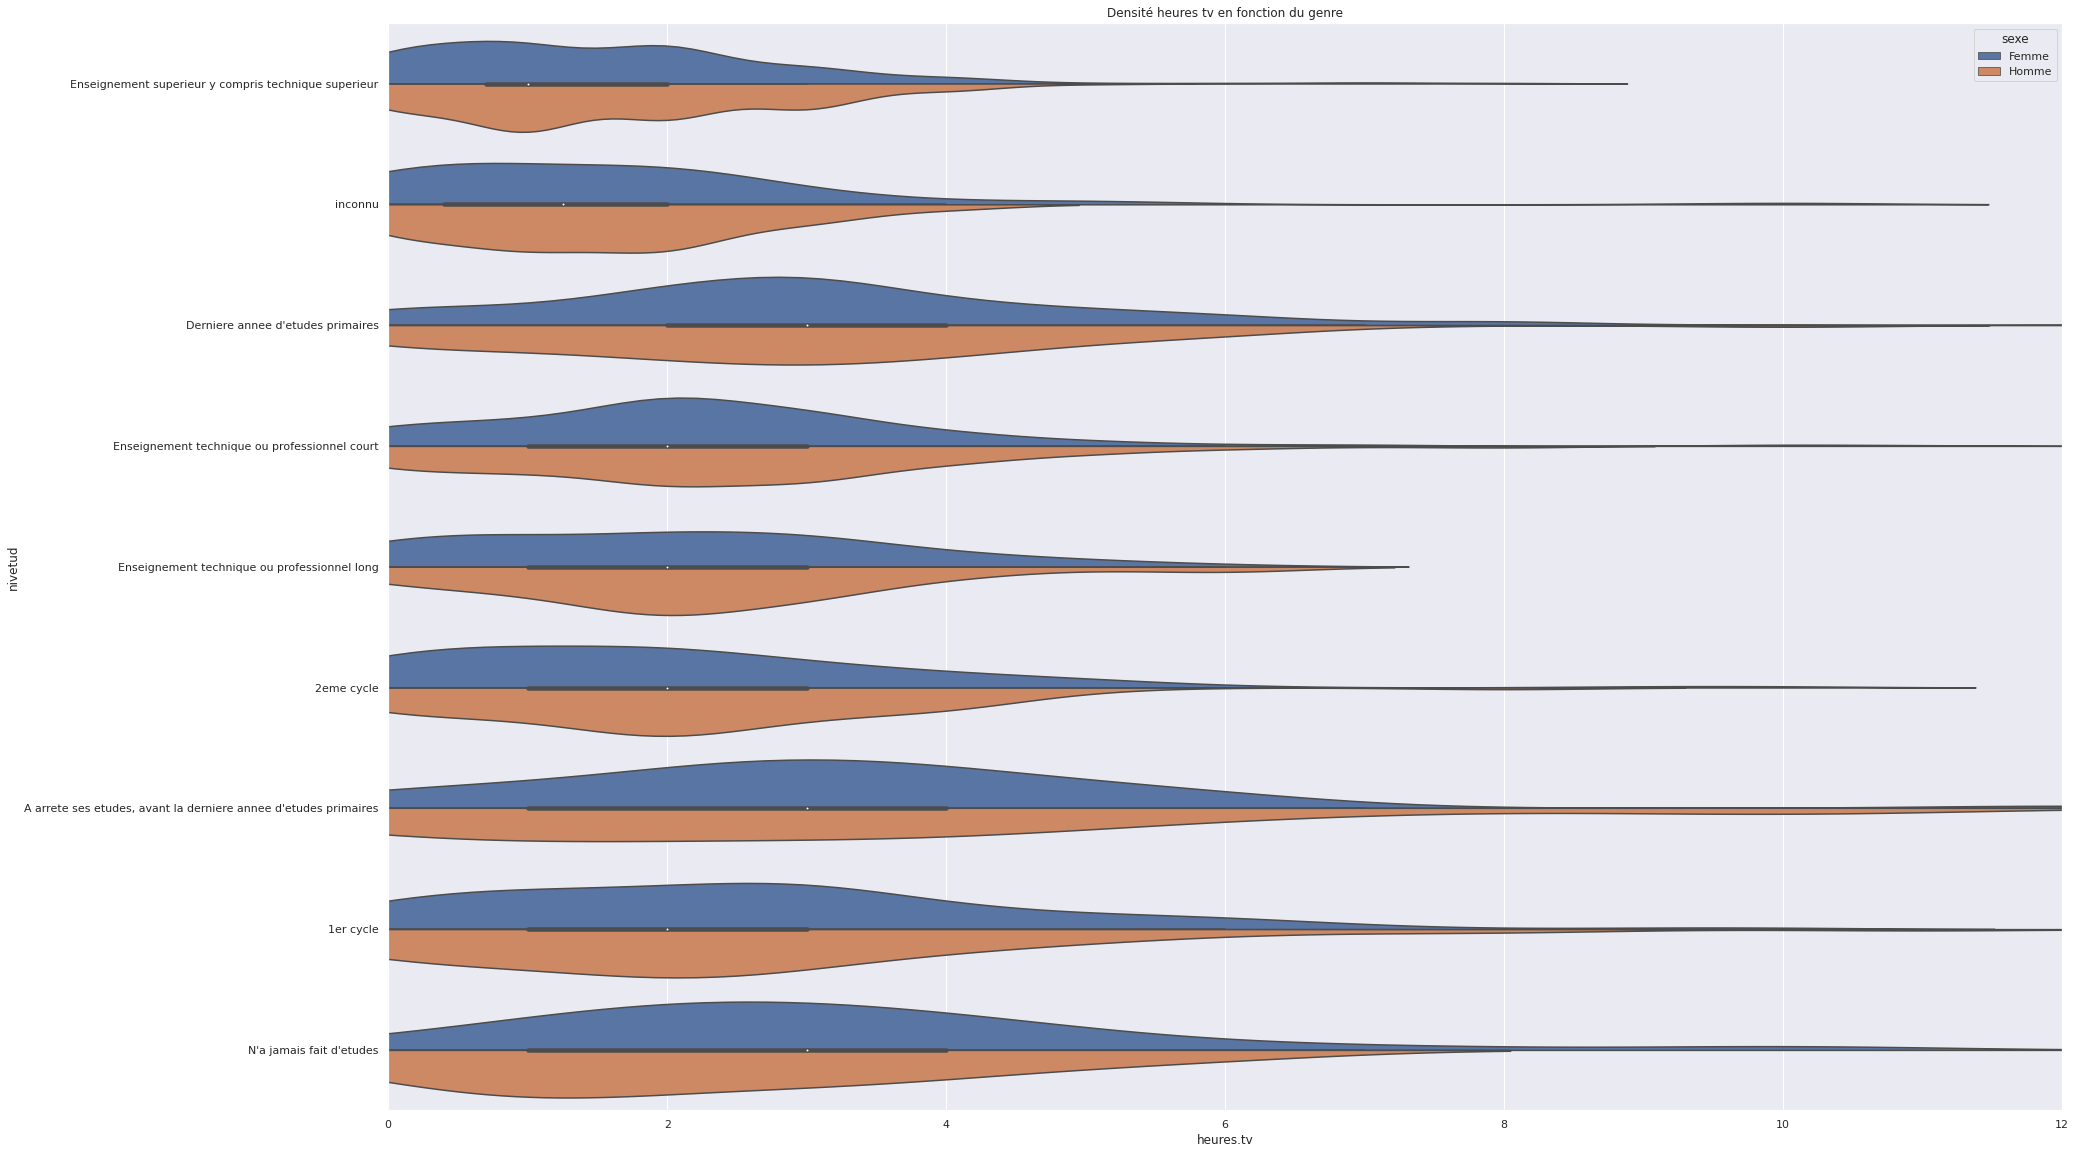

In [41]:
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(30, 20)})

### Remplacer al variable qualitative et inspecter les différentes distributions 
ax = sns.violinplot(data=obs, x='heures.tv', y='nivetud', hue='sexe', split=True)  # y ='occup', relig, trav.satisf, qualif



a = obs['heures.tv']
ax.set_xlim(left=min(a), right=max(a))
ax.set_title("Densité heures tv en fonction du genre")

In [42]:
###  Explorer les différences :  Enseignement superieur y compris technique superieur ; 
obs[obs['nivetud'] == 'Enseignement superieur y compris technique superieur']['heures.tv'].describe()

count    441.000000
mean       1.563265
std        1.240147
min        0.000000
25%        0.700000
50%        1.000000
75%        2.000000
max        8.000000
Name: heures.tv, dtype: float64

In [43]:
###  Explorer les différences :;  Enseignement superieur y compris technique superieur ; 
obs[obs['nivetud'].isin(["A arrete ses etudes, avant la derniere annee d'etudes primaires","N'a jamais fait d'etudes"])]['heures.tv'].describe()

count    125.000000
mean       3.034400
std        2.320355
min        0.000000
25%        1.000000
50%        3.000000
75%        4.000000
max       12.000000
Name: heures.tv, dtype: float64

# Deux variables qualitatives


* Hamon, Chapitre 4, 99-111


In [166]:
obs.head()

,age,sexe,nivetud,poids,occup,qualif,freres.soeurs,clso,relig,trav.imp,trav.satisf,hard.rock,lecture.bd,peche.chasse,cuisine,bricol,cinema,sport,heures.tv,h_tv_cut
id,,,,,,,,,,,,,,,,,,,,
1,28,Femme,Enseignement superieur y compris technique sup...,2634.398216,Exerce une profession,Employe,8,Oui,Ni croyance ni appartenance,Peu important,Insatisfaction,Non,Non,Non,Oui,Non,Non,Non,0.0,"[0.0, 0.51)"
2,23,Femme,inconnu,9738.395776,"Etudiant, eleve",NaN,2,Oui,Ni croyance ni appartenance,NaN,NaN,Non,Non,Non,Non,Non,Oui,Oui,1.0,"[0.51, 2.01)"
3,59,Homme,Derniere annee d'etudes primaires,3994.102459,Exerce une profession,Technicien,2,Non,Ni croyance ni appartenance,Aussi important que le reste,Equilibre,Non,Non,Non,Non,Non,Non,Oui,0.0,"[0.0, 0.51)"
4,34,Homme,Enseignement superieur y compris technique sup...,5731.661508,Exerce une profession,Technicien,1,Non,Appartenance sans pratique,Moins important que le reste,Satisfaction,Non,Non,Non,Oui,Oui,Oui,Oui,2.0,"[0.51, 2.01)"
5,71,Femme,Derniere annee d'etudes primaires,4329.094002,Retraite,Employe,0,Oui,Pratiquant regulier,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,3.0,"[2.01, 5.01)"


In [44]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            2000 non-null   int64   
 1   sexe           2000 non-null   object  
 2   nivetud        2000 non-null   object  
 3   poids          2000 non-null   float64 
 4   occup          2000 non-null   object  
 5   qualif         1653 non-null   object  
 6   freres.soeurs  2000 non-null   int64   
 7   clso           2000 non-null   object  
 8   relig          2000 non-null   object  
 9   trav.imp       1048 non-null   object  
 10  trav.satisf    1048 non-null   object  
 11  hard.rock      2000 non-null   object  
 12  lecture.bd     2000 non-null   object  
 13  peche.chasse   2000 non-null   object  
 14  cuisine        2000 non-null   object  
 15  bricol         2000 non-null   object  
 16  cinema         2000 non-null   object  
 17  sport          2000 non-null   ob

### Tableau de contingence

In [45]:
### Le type d'origine est 'category' il faut transformer en 'str'
##  pour éviter le message d'erreur en créant la pivot_table
obs['h_tv_cut']= obs['h_tv_cut'].astype(str)

In [77]:
### La fonction pivot_table produit un tableau de contingence
## Au centre du tableau se trouvent les effectifs conjoints, 
## aux bords les effectifs marginaux qui correspondent 
## aux distributions indépendantes des variables

X = "h_tv_cut"  # 
Y = "nivetud"

pv_obs = obs[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
pv_obs.index = [x[:20] + '...' + x[-8:] if x != 'Total' else 'Total' for x in pv_obs.index ]
pv_obs

h_tv_cut,"[0.0, 0.51)","[0.51, 2.01)","[2.01, 5.01)","[5.01, 15.0)",Total
1er cycle...er cycle,35,75,77,17,204
2eme cycle...me cycle,38,86,55,4,183
"A arrete ses etudes,...rimaires",13,22,40,11,86
Derniere annee d'etu...rimaires,41,99,168,33,341
Enseignement superie...uperieur,98,250,89,4,441
Enseignement techniq...el court,69,204,174,16,463
Enseignement techniq...nel long,20,61,46,4,131
N'a jamais fait d'et...d'etudes,3,16,17,3,39
inconnu...inconnu,30,64,16,2,112
Total,347,877,682,94,2000


In [78]:
### Fréquence conjointe et fréquence marginale (proportion par rapport au total)

pv_obs_frequence = np.round(pv_obs*100/pv_obs.iloc[-1,-1],1)
pv_obs_frequence

h_tv_cut,"[0.0, 0.51)","[0.51, 2.01)","[2.01, 5.01)","[5.01, 15.0)",Total
1er cycle...er cycle,1.8,3.8,3.8,0.8,10.2
2eme cycle...me cycle,1.9,4.3,2.8,0.2,9.2
"A arrete ses etudes,...rimaires",0.6,1.1,2.0,0.6,4.3
Derniere annee d'etu...rimaires,2.0,5.0,8.4,1.6,17.0
Enseignement superie...uperieur,4.9,12.5,4.4,0.2,22.0
Enseignement techniq...el court,3.4,10.2,8.7,0.8,23.2
Enseignement techniq...nel long,1.0,3.0,2.3,0.2,6.6
N'a jamais fait d'et...d'etudes,0.2,0.8,0.8,0.2,2.0
inconnu...inconnu,1.5,3.2,0.8,0.1,5.6
Total,17.4,43.8,34.1,4.7,100.0


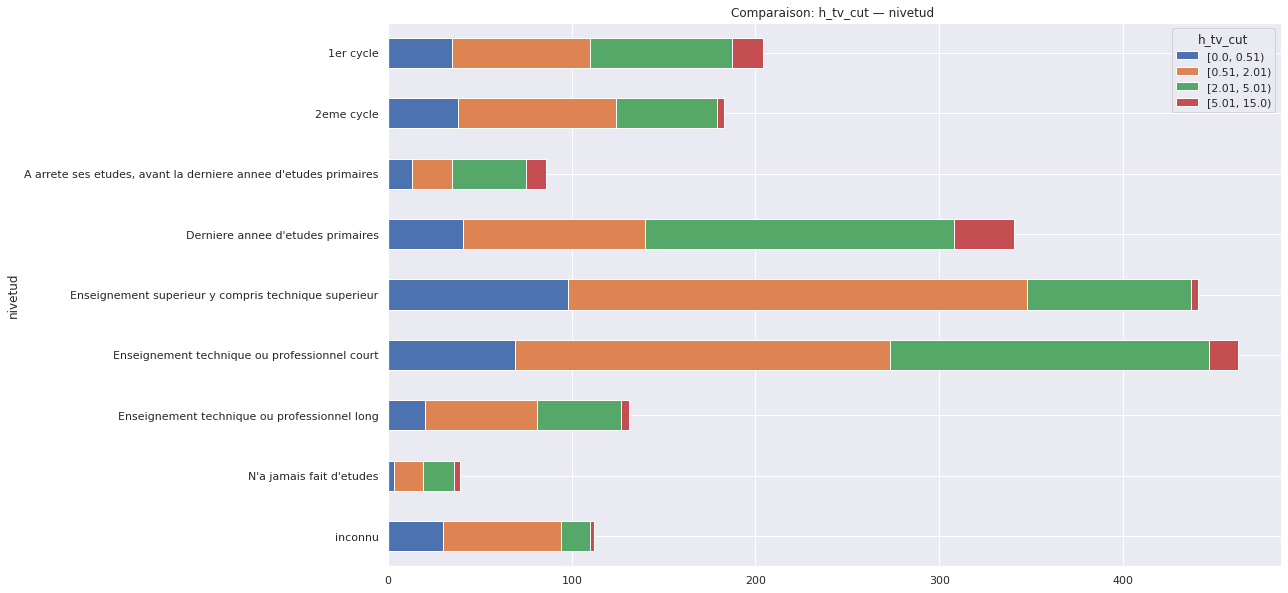

In [79]:
g = obs[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=Y, ascending=False) \
        .plot( kind='barh', stacked=True,  figsize=(16,10),  title = f'Comparaison: {X} — {Y} ')

In [80]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des lignes
stacked_data = pv_obs.apply(lambda x: x*100/sum(x)*2, axis=1) # axis=0
stacked_data

h_tv_cut,"[0.0, 0.51)","[0.51, 2.01)","[2.01, 5.01)","[5.01, 15.0)",Total
1er cycle...er cycle,17.156863,36.764706,37.745098,8.333333,100.0
2eme cycle...me cycle,20.765027,46.994536,30.054645,2.185792,100.0
"A arrete ses etudes,...rimaires",15.116279,25.581395,46.511628,12.790698,100.0
Derniere annee d'etu...rimaires,12.023460,29.032258,49.266862,9.677419,100.0
Enseignement superie...uperieur,22.222222,56.689342,20.181406,0.907029,100.0
Enseignement techniq...el court,14.902808,44.060475,37.580994,3.455724,100.0
Enseignement techniq...nel long,15.267176,46.564885,35.114504,3.053435,100.0
N'a jamais fait d'et...d'etudes,7.692308,41.025641,43.589744,7.692308,100.0
inconnu...inconnu,26.785714,57.142857,14.285714,1.785714,100.0
Total,17.350000,43.850000,34.100000,4.700000,100.0


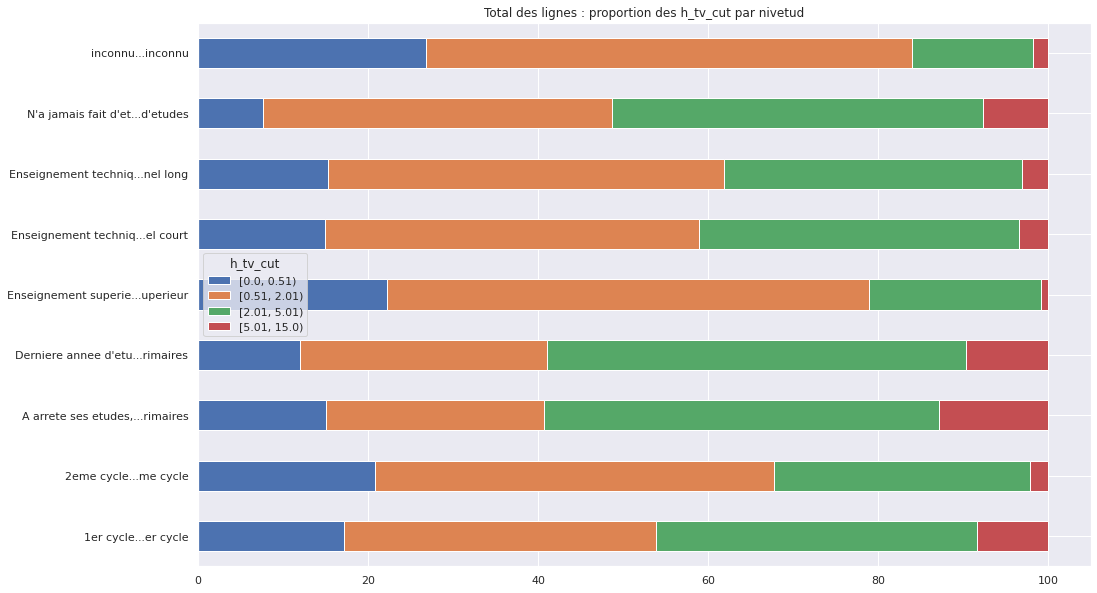

In [87]:
# print(stacked_data.iloc[0:-1, 0:-1])

#.sort_values(by=Y, ascending=False)\

plot = stacked_data.iloc[0:-1, 0:-1] \
.plot(kind="barh", stacked=True, figsize=(16,10), title=f'Total des lignes : proportion des {X} par {Y}')


In [61]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des colonnes (ou des lignes après avoir interverti les variables dans le tableau)
# axis=0 à la place de axis=1
stacked_data = pv_obs.apply(lambda x: x*100/sum(x)*2, axis=0) # axis=0  1
stacked_data.transpose()

nivetud,1er cycle,2eme cycle,"A arrete ses etudes, avant la derniere annee d'etudes primaires",Derniere annee d'etudes primaires,Enseignement superieur y compris technique superieur,Enseignement technique ou professionnel court,Enseignement technique ou professionnel long,N'a jamais fait d'etudes,inconnu,Total
h_tv_cut,,,,,,,,,,
"[0.0, 0.51)",10.086455,10.951009,3.746398,11.815562,28.242075,19.884726,5.763689,0.864553,8.645533,100.0
"[0.51, 2.01)",8.551881,9.806157,2.508552,11.288483,28.506271,23.261117,6.955530,1.824401,7.297605,100.0
"[2.01, 5.01)",11.290323,8.064516,5.865103,24.633431,13.049853,25.513196,6.744868,2.492669,2.346041,100.0
"[5.01, 15.0)",18.085106,4.255319,11.702128,35.106383,4.255319,17.021277,4.255319,3.191489,2.127660,100.0
Total,10.200000,9.150000,4.300000,17.050000,22.050000,23.150000,6.550000,1.950000,5.600000,100.0


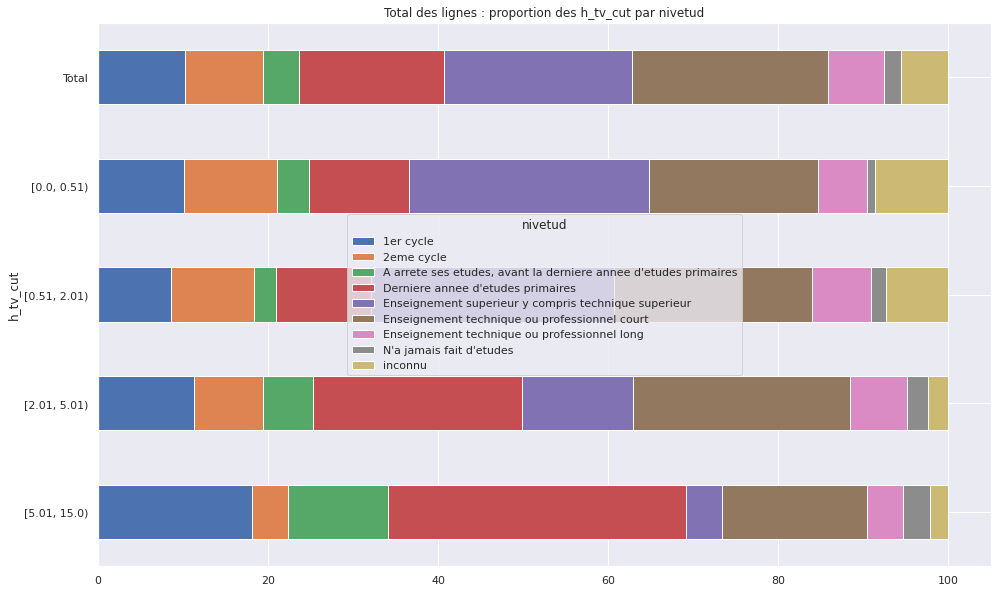

In [62]:
# print(stacked_data.iloc[0:-1, 0:])

plot = stacked_data.iloc[0:-1, 0:].transpose().sort_values(by=X, ascending=False)\
.plot(kind="barh", stacked=True, figsize=(16,10), title=f'Total des lignes : proportion des {X} par {Y}')

### Tableau en cas d'indépendance

Produit des marges divisé par le total et arrondi

In [63]:
### Total général, dernière cellule de la dernière ligne
pv_obs.iat[-1,-1]

2000

In [64]:
tx = pv_obs.loc[:,["Total"]]
ty = pv_obs.loc[["Total"],:]
n = pv_obs.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


h_tv_cut                                            [0.0, 0.51)  [0.51, 2.01)  \
nivetud                                                                         
1er cycle                                                    35            89   
2eme cycle                                                   31            80   
A arrete ses etudes, avant la derniere annee d'...           14            37   
Derniere annee d'etudes primaires                            59           149   
Enseignement superieur y compris technique supe...           76           193   
Enseignement technique ou professionnel court                80           203   
Enseignement technique ou professionnel long                 22            57   
N'a jamais fait d'etudes                                      6            17   
inconnu                                                      19            49   
Total                                                       347           877   

h_tv_cut                   

In [65]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (pv_obs-indep).iloc[:-1,:-1]
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.astype(int))


h_tv_cut                                            [0.0, 0.51)  [0.51, 2.01)  \
nivetud                                                                         
1er cycle                                                     0           -14   
2eme cycle                                                    6             5   
A arrete ses etudes, avant la derniere annee d'...           -1           -15   
Derniere annee d'etudes primaires                           -18           -50   
Enseignement superieur y compris technique supe...           21            56   
Enseignement technique ou professionnel court               -11             0   
Enseignement technique ou professionnel long                 -2             3   
N'a jamais fait d'etudes                                     -3            -1   
inconnu                                                      10            14   

h_tv_cut                                            [2.01, 5.01)  [5.01, 15.0)  
nivetud                    

In [66]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = (pv_obs-indep)**2/indep
ecarts_ponderes.iloc[:-1,:-1]

h_tv_cut,"[0.0, 0.51)","[0.51, 2.01)","[2.01, 5.01)","[5.01, 15.0)"
nivetud,,,,
1er cycle,0.004386,2.335481,0.794867,5.729844
2eme cycle,1.230099,0.412662,0.878234,2.461249
"A arrete ses etudes, avant la derniere annee d'etudes primaires",0.247319,6.545451,3.885094,11.977675
Derniere annee d'etudes primaires,5.576288,17.074533,23.003371,17.974838
Enseignement superieur y compris technique superieur,6.033833,16.578856,25.053878,13.498940
Enseignement technique ou professionnel court,1.598151,0.004677,1.645254,1.525165
Enseignement technique ou professionnel long,0.327550,0.220194,0.039539,0.755668
N'a jamais fait d'etudes,2.096582,0.070947,1.029957,0.742984
inconnu,5.747356,4.513205,12.894974,2.023878


196.53297918198112


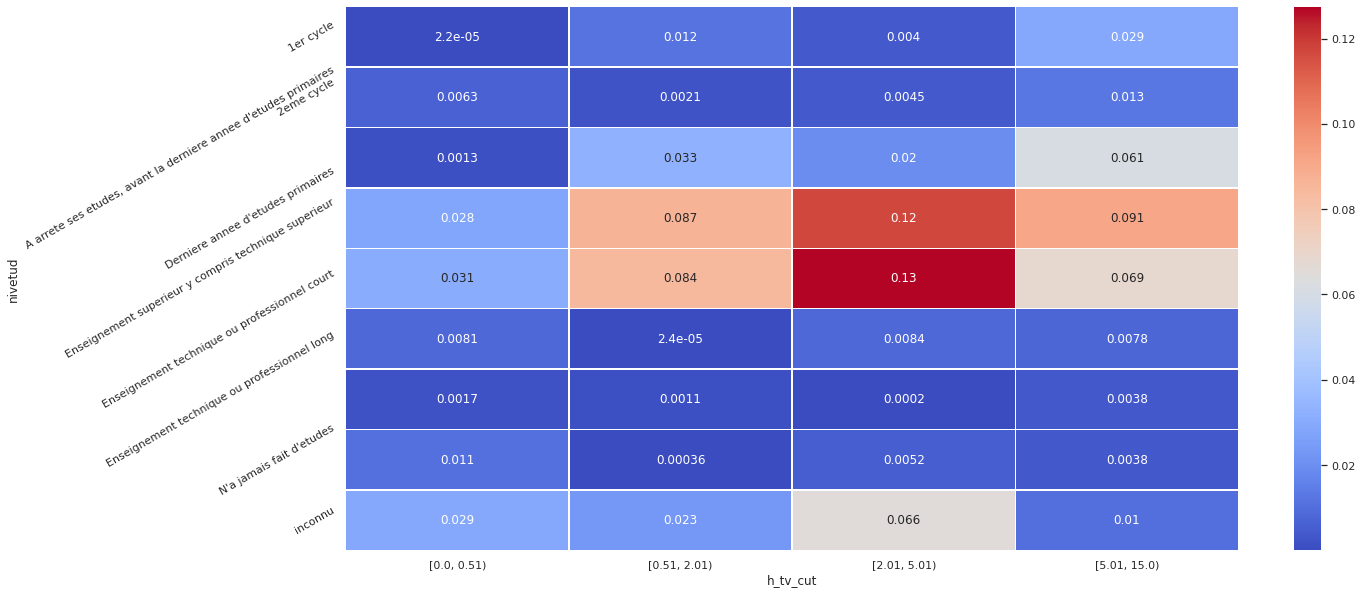

In [67]:
xi_n = ecarts_ponderes.sum().sum()
print(xi_n)


tableau = ecarts_ponderes.iloc[:-1,:-1]/xi_n
fig, ax = plt.subplots(figsize=(20,10))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

## Croisements multiples par remplacement avec ou sans avec filtre

In [68]:
obs.head()

,age,sexe,nivetud,poids,occup,qualif,freres.soeurs,clso,relig,trav.imp,trav.satisf,hard.rock,lecture.bd,peche.chasse,cuisine,bricol,cinema,sport,heures.tv,h_tv_cut
id,,,,,,,,,,,,,,,,,,,,
1,28,Femme,Enseignement superieur y compris technique sup...,2634.398216,Exerce une profession,Employe,8,Oui,Ni croyance ni appartenance,Peu important,Insatisfaction,Non,Non,Non,Oui,Non,Non,Non,0.0,"[0.0, 0.51)"
2,23,Femme,inconnu,9738.395776,"Etudiant, eleve",NaN,2,Oui,Ni croyance ni appartenance,NaN,NaN,Non,Non,Non,Non,Non,Oui,Oui,1.0,"[0.51, 2.01)"
3,59,Homme,Derniere annee d'etudes primaires,3994.102459,Exerce une profession,Technicien,2,Non,Ni croyance ni appartenance,Aussi important que le reste,Equilibre,Non,Non,Non,Non,Non,Non,Oui,0.0,"[0.0, 0.51)"
4,34,Homme,Enseignement superieur y compris technique sup...,5731.661508,Exerce une profession,Technicien,1,Non,Appartenance sans pratique,Moins important que le reste,Satisfaction,Non,Non,Non,Oui,Oui,Oui,Oui,2.0,"[0.51, 2.01)"
5,71,Femme,Derniere annee d'etudes primaires,4329.094002,Retraite,Employe,0,Oui,Pratiquant regulier,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,3.0,"[2.01, 5.01)"


In [69]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            2000 non-null   int64  
 1   sexe           2000 non-null   object 
 2   nivetud        2000 non-null   object 
 3   poids          2000 non-null   float64
 4   occup          2000 non-null   object 
 5   qualif         1653 non-null   object 
 6   freres.soeurs  2000 non-null   int64  
 7   clso           2000 non-null   object 
 8   relig          2000 non-null   object 
 9   trav.imp       1048 non-null   object 
 10  trav.satisf    1048 non-null   object 
 11  hard.rock      2000 non-null   object 
 12  lecture.bd     2000 non-null   object 
 13  peche.chasse   2000 non-null   object 
 14  cuisine        2000 non-null   object 
 15  bricol         2000 non-null   object 
 16  cinema         2000 non-null   object 
 17  sport          2000 non-null   object 
 18  heures.t

In [70]:
### La fonction pivot_table produit un tableau de contingence
## Au centre du tableau se trouvent les effectifs conjoints, 
## aux bords les effectifs marginaux qui correspondent 
## aux distributions indépendantes des variables

X = "qualif"  # qualif  trav.satisf  relig occup sexe
Y = "nivetud" # sexe nivetud

### https://towardsdatascience.com/how-to-drop-rows-in-pandas-dataframes-with-nan-values-in-certain-columns-7613ad1a7f25
obs1 = obs.dropna(subset=[X,Y])
# obs1 = obs.dropna(subset=[X,Y])[obs['sexe']=='Femme']


pv_obs = obs1[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
pv_obs.index = [x[:20] + '...' + x[-8:] if x != 'Total' else 'Total' for x in pv_obs.index ]
pv_obs

qualif,Autre,Cadre,Employe,Ouvrier qualifie,Ouvrier specialise,Profession intermediaire,Technicien,Total
1er cycle...er cycle,4,9,74,36,38,10,4,175
2eme cycle...me cycle,7,30,74,16,5,27,9,168
"A arrete ses etudes,...rimaires",1,0,23,11,26,1,1,63
Derniere annee d'etu...rimaires,7,4,102,79,57,11,7,267
Enseignement superie...uperieur,15,188,98,4,4,61,25,395
Enseignement techniq...el court,13,11,165,126,48,30,24,417
Enseignement techniq...nel long,3,15,44,13,7,19,15,116
N'a jamais fait d'et...d'etudes,1,0,5,4,15,1,1,27
inconnu...inconnu,7,3,9,3,3,0,0,25
Total,58,260,594,292,203,160,86,1653


In [71]:
### Fréquence conjointe et fréquence marginale (proportion par rapport au total)

pv_obs_frequence = np.round(pv_obs*100/pv_obs.iloc[-1,-1],1)
pv_obs_frequence

qualif,Autre,Cadre,Employe,Ouvrier qualifie,Ouvrier specialise,Profession intermediaire,Technicien,Total
1er cycle...er cycle,0.2,0.5,4.5,2.2,2.3,0.6,0.2,10.6
2eme cycle...me cycle,0.4,1.8,4.5,1.0,0.3,1.6,0.5,10.2
"A arrete ses etudes,...rimaires",0.1,0.0,1.4,0.7,1.6,0.1,0.1,3.8
Derniere annee d'etu...rimaires,0.4,0.2,6.2,4.8,3.4,0.7,0.4,16.2
Enseignement superie...uperieur,0.9,11.4,5.9,0.2,0.2,3.7,1.5,23.9
Enseignement techniq...el court,0.8,0.7,10.0,7.6,2.9,1.8,1.5,25.2
Enseignement techniq...nel long,0.2,0.9,2.7,0.8,0.4,1.1,0.9,7.0
N'a jamais fait d'et...d'etudes,0.1,0.0,0.3,0.2,0.9,0.1,0.1,1.6
inconnu...inconnu,0.4,0.2,0.5,0.2,0.2,0.0,0.0,1.5
Total,3.5,15.7,35.9,17.7,12.3,9.7,5.2,100.0


In [72]:
### Total général, dernière cellule de la dernière ligne
pv_obs.iat[-1,-1]

1653

In [73]:
tx = pv_obs.loc[:,["Total"]]
ty = pv_obs.loc[["Total"],:]
n = pv_obs.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


qualif                           Autre  Cadre  Employe  Ouvrier qualifie  \
1er cycle...er cycle                 6     27       62                30   
2eme cycle...me cycle                5     26       60                29   
A arrete ses etudes,...rimaires      2      9       22                11   
Derniere annee d'etu...rimaires      9     41       95                47   
Enseignement superie...uperieur     13     62      141                69   
Enseignement techniq...el court     14     65      149                73   
Enseignement techniq...nel long      4     18       41                20   
N'a jamais fait d'et...d'etudes      0      4        9                 4   
inconnu...inconnu                    0      3        8                 4   
Total                               58    260      594               292   

qualif                           Ouvrier specialise  Profession intermediaire  \
1er cycle...er cycle                             21                        16   
2

In [74]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (pv_obs-indep).iloc[:-1,:-1]
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.astype(int))


qualif                           Autre  Cadre  Employe  Ouvrier qualifie  \
1er cycle...er cycle                -2    -18       11                 5   
2eme cycle...me cycle                1      3       13               -13   
A arrete ses etudes,...rimaires     -1     -9        0                 0   
Derniere annee d'etu...rimaires     -2    -37        6                31   
Enseignement superie...uperieur      1    125      -43               -65   
Enseignement techniq...el court     -1    -54       15                52   
Enseignement techniq...nel long     -1     -3        2                -7   
N'a jamais fait d'et...d'etudes      0     -4       -4                 0   
inconnu...inconnu                    6      0        0                -1   

qualif                           Ouvrier specialise  Profession intermediaire  \
1er cycle...er cycle                             16                        -6   
2eme cycle...me cycle                           -15                        10

In [75]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = (pv_obs-indep)**2/indep
ecarts_ponderes.iloc[:-1,:-1]

qualif,Autre,Cadre,Employe,Ouvrier qualifie,Ouvrier specialise,Profession intermediaire,Technicien
1er cycle...er cycle,0.746065,12.468414,1.964335,0.836935,12.681432,2.842470,2.862000
2eme cycle...me cycle,0.207237,0.483748,3.077186,6.303174,11.843314,7.091589,0.007706
"A arrete ses etudes,...rimaires",0.662907,9.909256,0.005762,0.001492,43.110992,4.261992,1.582771
Derniere annee d'etu...rimaires,0.598758,34.377356,0.382053,21.487418,17.876151,8.525872,3.418544
Enseignement superie...uperieur,0.093826,255.006112,13.603399,62.005469,40.838609,13.556505,0.963379
Enseignement techniq...el court,0.181939,45.434635,1.532202,37.186134,0.201277,2.660638,0.244874
Enseignement techniq...nel long,0.281382,0.577345,0.128655,2.738660,3.685269,5.379633,13.317064
N'a jamais fait d'et...d'etudes,0.002924,4.246824,2.279052,0.124152,41.172932,0.996069,0.116605
inconnu...inconnu,42.737193,0.221014,0.000030,0.454158,0.001604,2.419843,1.300665


805.3070010439804


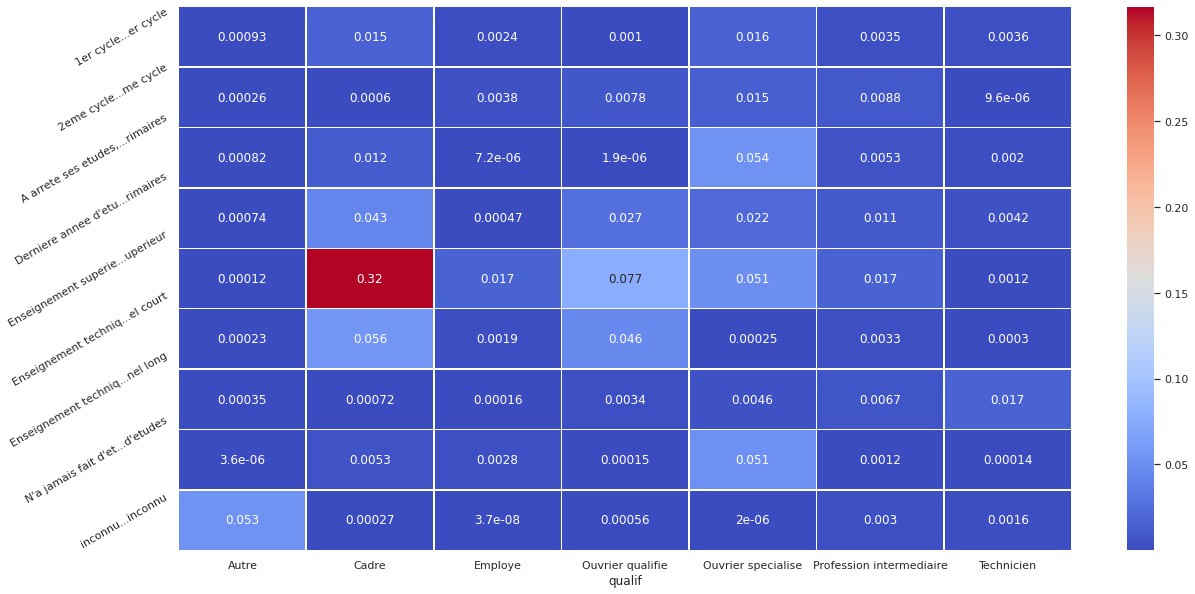

In [76]:
xi_n = ecarts_ponderes.sum().sum()
print(xi_n)


tableau = ecarts_ponderes.iloc[:-1,:-1]/xi_n
fig, ax = plt.subplots(figsize=(20,10))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)